In [1]:
import numpy as np
import cvxpy as cp
from util_circle_packing import plot_circles
import matplotlib.pyplot as plt

In [2]:
# data generation
np.random.seed(0)
rng = np.random.default_rng(0)
n = 10
radius = rng.uniform(1.0, 3.0, n)
init_centers = rng.uniform(-5.0, 5.0, (2, n))

In [3]:
# build optimization problem
centers = cp.Variable((n, 2), name='c')
constraints = []
for i in range(n - 1):
    constraints += [cp.sum((centers[i, :] - centers[i+1:, :]) ** 2, axis=1) >=
                     (radius[i] + radius[i+1:]) ** 2]
cost = cp.max(cp.norm_inf(centers, axis=1) + radius)
prob = cp.Problem(cp.Minimize(cost), constraints)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:      121
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       90
Total number of inequality constraints...............:       95
        inequality constraints with only lower bounds:       95
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 44

    

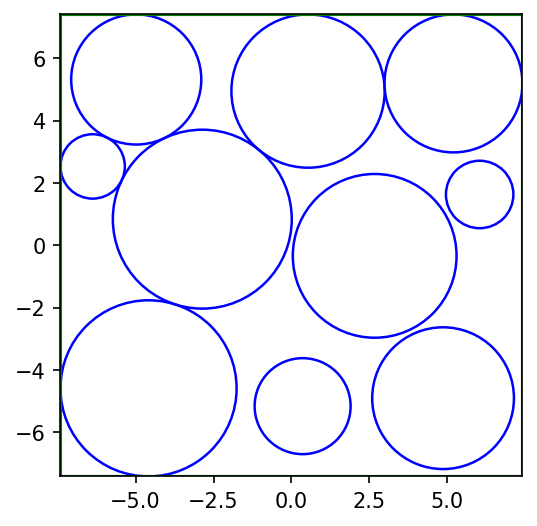

In [4]:
# initialize centers to random locations and solve
centers.value = init_centers.T
prob.solve(nlp=True, solver=cp.IPOPT, verbose=False)
L = prob.value
plot_circles(centers.value.T, radius, L, filename="figures/circle_packing_initial.pdf")

In [ ]:
# solve problem many times, each time initializing by uniformly sampling from
# sample_bounds, and return the best solution found
centers.value = None # must reset before re-solving
centers.sample_bounds = [-5.0, 5.0]  
prob.solve(nlp=True, solver=cp.IPOPT, verbose=False, best_of=10)
best_centers = centers.value

Starting NLP solve 1 of 10
Total number of variables............................:      121
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       90
Total number of inequality constraints...............:       95
        inequality constraints with only lower bounds:       95
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

Starting NLP solve 2 of 10
Number of Iterations....: 50

                                   (scaled)                 (unscaled)
Objective...............:   7.4111585476321569e+00    7.4111585476321569e+00
Dual infeasibility......:   3.3746906311082903e-11    3.3746906311082903e-11
Constraint violation....:   1.7763568394002505e-15    1.7763568394002505e-15
Complementarity.........:   2.0458808

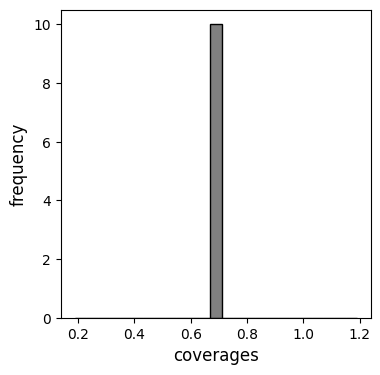

In [6]:
all_objs = prob.solver_stats.extra_stats['all_objs_from_best_of']
square_size = all_objs * 2
pi = np.pi
ratios = pi * np.sum(np.square(radius)) / (square_size**2)

# plot histogram
best_centers = centers.value
fig = plt.figure(figsize=(4, 4))
plt.hist(ratios, bins=25, color='gray', edgecolor='black')
plt.xlabel('coverages', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.savefig("circle_packing_histogram.pdf")

In [ ]:
plot_circles(best_centers.T, radius, prob.value, filename="figures/circle_packing_best.pdf")